In [33]:
%reload_ext autoreload
%autoreload 2

In [34]:
import os
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt

from libs.usage_examples import get_acceptance_indexes
from libs.noise_filter import NoiseFilter

import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\onury\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\onury\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\onury\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\onury\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\onury\AppData\Roaming\nltk_data...
[

True

In [35]:
LABEL_COL = '2_way_label'

# Import Dataset

In [36]:
data_dir = "./data"
# data_path = os.path.join(data_dir, 'merged_cleaned_data_v26_NoImage.tsv')
# df = pd.read_csv(data_path, sep='\t')
data_path = os.path.join(data_dir, 'merged_cleaned_data_v34_no_photo.csv')
df = pd.read_csv(data_path)
# df = df[:1000]

In [37]:
df.describe()

,linked_submission_id,num_comments,score,upvote_ratio,2_way_label,3_way_label,6_way_label
count,0.0,175910.000000,175910.000000,175910.000000,175910.000000,175910.000000,175910.000000
mean,NaN,20.892206,302.834063,0.846546,0.713336,0.560014,0.705435
std,NaN,113.284319,2239.434332,0.121943,0.452204,0.890563,1.240889
min,NaN,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000
25%,NaN,2.000000,4.000000,0.750000,0.000000,0.000000,0.000000
50%,NaN,4.000000,11.000000,0.860000,1.000000,0.000000,0.000000
75%,NaN,11.000000,37.000000,0.950000,1.000000,2.000000,2.000000
max,NaN,6957.000000,104268.000000,1.000000,1.000000,2.000000,5.000000


In [38]:
df.head()

,author,clean_title,hasImage,id,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label,comments_orig
0,NaN,escobar a couple of thoughts,False,71lejc,NaN,1,3,fakealbumcovers,Escobar - A Couple of Thoughts,0.81,0,2,1,Thank you for submitting your post to /r/fakea...
1,running_over_rivers,man found guilty of attempting to murder a corpse,False,3qlikw,NaN,2,26,nottheonion,Man found guilty of attempting to murder a corpse,0.86,1,0,0,Came here just to post this but I'm 5 hours to...
2,NaN,am i crazy is this a st bernard in runoff cand...,False,ccx7ru,NaN,11,13,mildlyinteresting,Am I crazy?? Is this a St. Bernard in runoff c...,0.71,1,0,0,It’a a wild sheep.|__|Came here to comment muf...
3,NaN,mark zuckerberg,False,8xz41a,NaN,4,831,fakehistoryporn,Mark Zuckerberg (2016),0.99,0,2,2,The whole time we thought Marl was the compute...
4,NaN,a tarantula and my shoe for comparison,False,df4x7j,NaN,7,4,mildlyinteresting,A tarantula(?) and my shoe for comparison,0.83,1,0,0,KILL IT WITH FIRE!|__|They’re as big as your f...


In [39]:
# Try using first comments only
# df['comments_orig'] = df['comments_orig'].apply(lambda x: x.split('|__|')[0] if isinstance(x, str) else x)
# df['comments'] = df['comments'].apply(lambda x: x.split('|__|')[0] if isinstance(x, str) else x)

# Apply Noise Filter

In [40]:
# Apply Noise Filter

config = {
    'MinLengths': {
        'title': 10,
        # 'comments': 10
        'comments_orig': 10
    },
    'ExcludeImages': True,
    'TextFilters': {
        # 'subreddit': ['news', 'nottheonion'],
    },
}
noise_filter = NoiseFilter(df, config)
df_filtered = noise_filter.apply()
# df_filtered = df_filtered[:10]
df_filtered


,author,clean_title,hasImage,id,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label,comments_orig
2,NaN,am i crazy is this a st bernard in runoff cand...,False,ccx7ru,NaN,11,13,mildlyinteresting,Am I crazy?? Is this a St. Bernard in runoff c...,0.71,1,0,0,It’a a wild sheep.|__|Came here to comment muf...
7,Strawberry_Poptart,cops drug raid in fla retirement community unc...,False,8s2x4x,NaN,8,86,nottheonion,Cops: Drug raid in Fla. retirement community u...,0.93,1,0,0,Bubbles has moved up in the world. https://you...
10,Kuandtity,farher crushes car after catching his daughter...,False,4zrzsh,NaN,1,2,nottheonion,Farher crushes car after catching his daughter...,0.75,1,0,0,Thank you for your submission to /r/NotTheOnio...
13,TheGhostOfTzvika,farm subsidies milking taxpayers as crop price...,False,2w7x5v,NaN,3,6,usanews,Farm subsidies: Milking taxpayers -- As crop p...,0.66,1,0,0,From the article -- ' THE father of Major Maj...
14,NaN,study marijuana users are more creative but it...,False,7d6b4e,NaN,2,7,nottheonion,Study: Marijuana users are more creative -- bu...,0.60,1,0,0,That article is awful TLDR: Weed really does ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175900,HeroAntagonist,socialist hipster who fooled the age is from f...,False,4sshj7,NaN,2,16,nottheonion,Ã¢ÂÂSocialistÃ¢ÂÂ hipster who fooled the A...,0.68,1,0,0,A follow up to a fake story I never read and d...
175901,dylansucks,yes there are people who wash and reuse condom...,False,944xtp,NaN,136,1382,nottheonion,"Yes, there are people who wash and reuse condo...",0.97,1,0,0,The CDC is just a bunch of shills for big cond...
175902,domo415,this farm needs volunteers to snuggle with its...,False,462vfu,NaN,6,25,nottheonion,This farm needs volunteers to snuggle with its...,0.84,1,0,0,I would do it! But the drive might be a bit Im...
175903,Nuyz,is the ok sign racist cubs fans hand gesture s...,False,bmjxe0,NaN,142,16,nottheonion,Is the OK Sign Racist? Cubs FanÃ¢ÂÂs Hand Ge...,0.73,1,0,0,No. Next question?|__|Ridiculous coming from ...


# Get Acceptance Indexes

In [ ]:
def calculate_acceptance_indexes(title, comments, tag=None):
    comment_list = comments.split("|__|")
    results = get_acceptance_indexes(title, comment_list)
    return results

def apply_indexers(df, ref_col, subject_col):
    df_indexed = df.copy()
    df_indexed = pd.concat([df_indexed, df_indexed.apply(lambda x: calculate_acceptance_indexes(x[ref_col], x[subject_col]), axis=1).apply(pd.Series)], axis=1)
    
    return df_indexed


df_orig = apply_indexers(df_filtered, 'title', 'comments_orig')
# df_clean = apply_indexers(df_filtered, 'clean_title', 'comments')
df_orig

# Output Results

## Save Datasets for next stage

In [ ]:
# Save the data out for the use in the ML Models
df_orig.to_csv('data_with_indexers_applied_to_original_data_all_acceptance_indexers_FULL.tsv', index=False, sep='\t')
# df_clean.to_csv('data_with_indexers_applied_to_clean_data.tsv', index=False, sep='\t')

## Evaluation
The remainder is just evaluating the outputs of the Acceptance Indexers 

In [ ]:
# dfo_2 = df_orig[['title', 'comments_orig', LABEL_COL, 'TextBlobAcceptanceIndexer', 'NRCAcceptanceIndexer', 'VADERAcceptanceIndexer']]
# dfc_2 = df_clean[['clean_title', 'comments', LABEL_COL, 'TextBlobAcceptanceIndexer', 'NRCAcceptanceIndexer', 'VADERAcceptanceIndexer']]
dfo_2 = df_orig[[LABEL_COL, 'TextBlobAcceptanceIndexer', 'NRCAcceptanceIndexer', 'VADERAcceptanceIndexer', 'CombinedAcceptanceIndexer']]
# dfc_2 = df_clean[[LABEL_COL, 'TextBlobAcceptanceIndexer', 'NRCAcceptanceIndexer', 'VADERAcceptanceIndexer']]

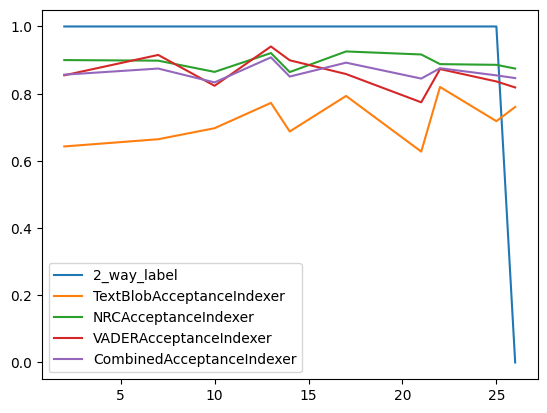

In [ ]:
dfo_2.plot(kind='line')
plt.show()

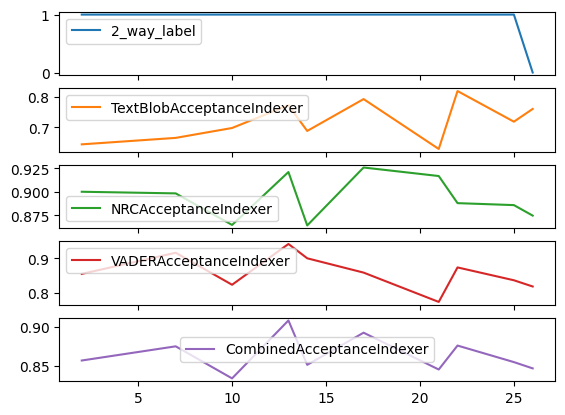

In [ ]:
dfo_2.plot(kind='line', subplots=True)
plt.show()

In [ ]:
dfo_2.describe()

,2_way_label,TextBlobAcceptanceIndexer,NRCAcceptanceIndexer,VADERAcceptanceIndexer,CombinedAcceptanceIndexer
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.900000,0.718430,0.893913,0.859424,0.863778
std,0.316228,0.065721,0.022374,0.049704,0.023361
min,0.000000,0.627604,0.864286,0.774331,0.833543
25%,1.000000,0.670201,0.877506,0.826727,0.847547
50%,1.000000,0.707741,0.893099,0.856526,0.855513
75%,1.000000,0.769567,0.912500,0.892862,0.875511
max,1.000000,0.819951,0.925694,0.940446,0.908048


array([[<Axes: xlabel='2_way_label', ylabel='2_way_label'>,
        <Axes: xlabel='TextBlobAcceptanceIndexer', ylabel='2_way_label'>,
        <Axes: xlabel='NRCAcceptanceIndexer', ylabel='2_way_label'>,
        <Axes: xlabel='VADERAcceptanceIndexer', ylabel='2_way_label'>,
        <Axes: xlabel='CombinedAcceptanceIndexer', ylabel='2_way_label'>],
       [<Axes: xlabel='2_way_label', ylabel='TextBlobAcceptanceIndexer'>,
        <Axes: xlabel='TextBlobAcceptanceIndexer', ylabel='TextBlobAcceptanceIndexer'>,
        <Axes: xlabel='NRCAcceptanceIndexer', ylabel='TextBlobAcceptanceIndexer'>,
        <Axes: xlabel='VADERAcceptanceIndexer', ylabel='TextBlobAcceptanceIndexer'>,
        <Axes: xlabel='CombinedAcceptanceIndexer', ylabel='TextBlobAcceptanceIndexer'>],
       [<Axes: xlabel='2_way_label', ylabel='NRCAcceptanceIndexer'>,
        <Axes: xlabel='TextBlobAcceptanceIndexer', ylabel='NRCAcceptanceIndexer'>,
        <Axes: xlabel='NRCAcceptanceIndexer', ylabel='NRCAcceptanceIndexer'>,
  

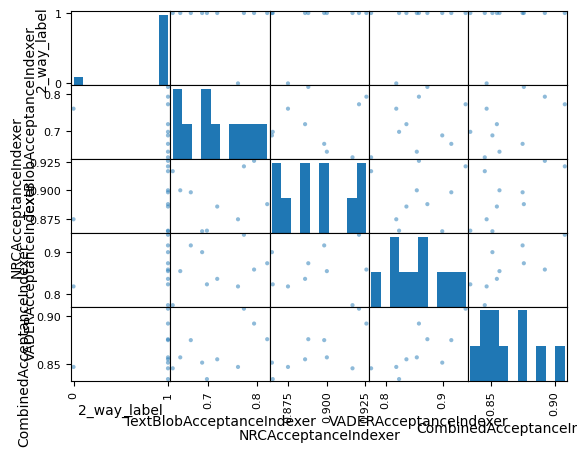

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfo_2)

In [ ]:
dfo_2.describe()

,2_way_label,TextBlobAcceptanceIndexer,NRCAcceptanceIndexer,VADERAcceptanceIndexer,CombinedAcceptanceIndexer
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.900000,0.718430,0.893913,0.859424,0.863778
std,0.316228,0.065721,0.022374,0.049704,0.023361
min,0.000000,0.627604,0.864286,0.774331,0.833543
25%,1.000000,0.670201,0.877506,0.826727,0.847547
50%,1.000000,0.707741,0.893099,0.856526,0.855513
75%,1.000000,0.769567,0.912500,0.892862,0.875511
max,1.000000,0.819951,0.925694,0.940446,0.908048


In [ ]:
data_sources = {
    'Orig': dfo_2,
    # 'Clean': dfc_2,
}

Applying thresholds for Orig...


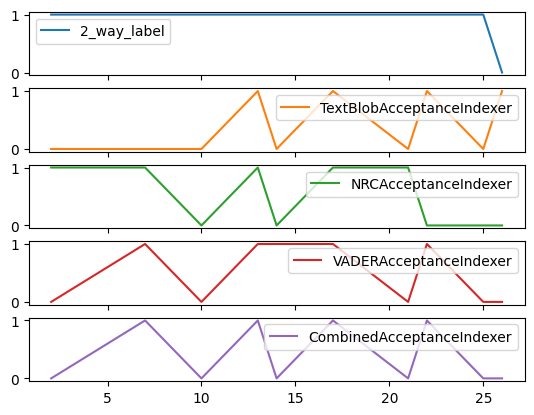

In [ ]:
def apply_threshold(df, col, threshold):
    # print(f"Checking {df[col]} > {threshold}")
    df[f"{col}"] = (df[col] > threshold).astype(int)

    return df

indexer_cols = [
    'TextBlobAcceptanceIndexer',
    'NRCAcceptanceIndexer',
    'VADERAcceptanceIndexer',
    'CombinedAcceptanceIndexer'
]

for name, df in data_sources.items():
    print(f"Applying thresholds for {name}...")
    df3 = df.copy()
    for col in indexer_cols:
        # df3 = apply_threshold(df3, col, df3[col].mean())

        df3 = apply_threshold(df3, col, (df3[col].min() + (df3[col].max() - df3[col].min()) / 2))


    df3.plot(kind='line', subplots=True)
    plt.show()

Class Balancer to ensure equal number of True and False samples (just for threshold determination)

In [ ]:
def balance_classes(df_in, ref_col):
    df = df_in.copy()

    # Count the number of 1s and 0s in the reference column
    num_zeros = df[ref_col].value_counts()[0]
    num_ones = df[ref_col].value_counts()[1]

    # Determine the minimum number of rows to keep
    min_rows = min(num_zeros, num_ones)

    # Filter the results to have an equal number of 0s and 1s
    if num_zeros > num_ones:
        df = pd.concat([
            df.loc[df[ref_col] == 0].sample(min_rows, random_state=42),
            df.loc[df[ref_col] == 1]
        ])
    else:
        df = pd.concat([
            df.loc[df[ref_col] == 0],
            df.loc[df[ref_col] == 1].sample(min_rows, random_state=42)
        ])

    print(f"Equal split leaves {len(df[df[ref_col] == 1])} True values and {len(df[df[ref_col] == 0])} False values")
    
    return df

In [ ]:
def validate(df, subject, reference):
    matches = df[subject] == df[reference]
    match_rate = matches.mean() * 100

    print(f"Match Rate between {subject} and {reference}: {match_rate:.2f}%")
    
    return match_rate


for name, df in data_sources.items():
    print(f"Validating results for {name}...")
    df3 = df.copy()
    df3 = balance_classes(df3, LABEL_COL)

    for col in indexer_cols:
        # print(col)
        threshold = (df3[col].min() + (df3[col].max() - df3[col].min()) / 2)
        print(f"Applying threshold of {threshold} for {col}...")
        df3 = apply_threshold(df3, col, threshold)
        validate(df3, col, LABEL_COL)

Validating results for Orig...
Equal split leaves 1 True values and 1 False values
Applying threshold of 0.7902349537037037 for TextBlobAcceptanceIndexer...
Match Rate between TextBlobAcceptanceIndexer and 2_way_label: 100.00%
Applying threshold of 0.8813284254307783 for NRCAcceptanceIndexer...
Match Rate between NRCAcceptanceIndexer and 2_way_label: 100.00%
Applying threshold of 0.8458896250000001 for VADERAcceptanceIndexer...
Match Rate between VADERAcceptanceIndexer and 2_way_label: 100.00%
Applying threshold of 0.8610820413571996 for CombinedAcceptanceIndexer...
Match Rate between CombinedAcceptanceIndexer and 2_way_label: 100.00%


Threshold Tuning

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

def tune_thresholds(df, subject, reference):
    thresholds = np.arange(df[subject].min(), df[subject].max(), 0.01)
    best_threshold = None
    best_accuracy = 0

    for threshold in thresholds:
        df['predicted'] = (df[subject] >= threshold).astype(int)
        # accuracy = (df['predicted'] == df[reference]).mean() * 100
        # accuracy = df['predicted'].corr(df[reference])
        # accuracy = abs(accuracy)
        accuracy = accuracy_score(df['predicted'], df[reference])
        if accuracy > best_accuracy:
            best_threshold = threshold
            best_accuracy = accuracy
        # print(f"Threshold: {threshold}, Accuracy: {accuracy}, Best Threshold: {best_threshold}, Best Accuracy: {best_accuracy}")

    return best_threshold, best_accuracy

for name, df in data_sources.items():
    print(f"Validating results for {name}...")
    df4 = df.copy()
    df4 = balance_classes(df4, LABEL_COL)
    for col in indexer_cols:
        th, acc = tune_thresholds(df4, col, LABEL_COL)
        # print(f"Match Rate between {col} and reference: {acc:.2f}% using a threshold of {th}")
        print(f"Best Match Rate between {col} and reference: {acc:.2f} using a threshold of {th}")

Validating results for Orig...
Equal split leaves 1 True values and 1 False values
Best Match Rate between TextBlobAcceptanceIndexer and reference: 1.00 using a threshold of 0.7705185185185186
Best Match Rate between NRCAcceptanceIndexer and reference: 1.00 using a threshold of 0.8847272727272728
Best Match Rate between VADERAcceptanceIndexer and reference: 1.00 using a threshold of 0.8285487500000001
Best Match Rate between CombinedAcceptanceIndexer and reference: 1.00 using a threshold of 0.8564065477693603


Normalisation of Acceptance Indexes

In [ ]:
# Apply normalisation to the Acceptance Indexes

# Normalise column between 0 and 1
def normalise_column(df, column):
    min_value = df[column].min()
    max_value = df[column].max()
    df[f"{column}_norm"] = (df[column] - min_value) / (max_value - min_value)
    return df

scaled_sources = {}
for name, df in data_sources.items():
    print(f"Normalising {name}...")
    df_scaled = df.copy()
    for col in indexer_cols:
        df_scaled = normalise_column(df_scaled, col)
    
    scaled_sources[name] = df_scaled

Normalising Orig...


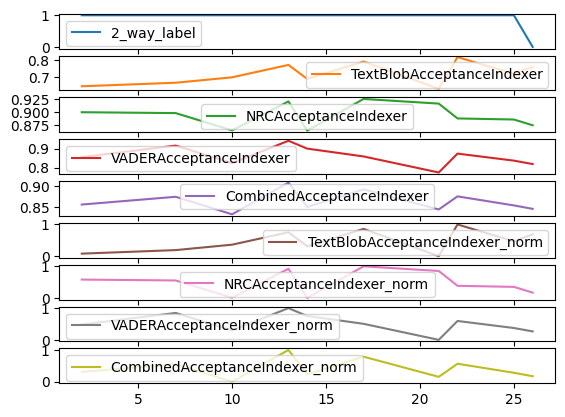

In [ ]:
# TODO: Compare indexers using cleaned and uncleaned data
df_scaled.plot(subplots=True)
plt.show()

In [ ]:

for name, df in scaled_sources.items():
    print(f"Validating results for {name}...")
    df5 = df.copy()
    df5 = balance_classes(df5, LABEL_COL)
    for col in indexer_cols:
        th, acc = tune_thresholds(df5, f"{col}_norm", LABEL_COL)
        # print(f"Match Rate between {col} and reference: {acc:.2f}% using a threshold of {th}")
        print(f"Best Match Rate between {col} and reference: {acc:.2f} using a threshold of {th:.2f}")

Validating results for Orig...
Equal split leaves 1 True values and 1 False values
Best Match Rate between TextBlobAcceptanceIndexer and reference: 1.00 using a threshold of 0.70
Best Match Rate between NRCAcceptanceIndexer and reference: 1.00 using a threshold of 0.18
Best Match Rate between VADERAcceptanceIndexer and reference: 1.00 using a threshold of 0.28
Best Match Rate between CombinedAcceptanceIndexer and reference: 1.00 using a threshold of 0.18
